In [1]:
import pandas as pd
import os

In [2]:
spotify_df = pd.read_csv(r'C:\Users\BABY GIRL\Documents\spmoststreamed\Spotify Most Streamed Songs.csv')
spotify2_df = pd.read_csv(
    r'C:\Users\BABY GIRL\Documents\spotify24\Most Streamed Spotify Songs 2024.csv',
    encoding='ISO-8859-1'
)
youtube_df = pd.read_csv(r'C:\Users\BABY GIRL\Documents\youtube most viewed\Most viewed music videos of all time.csv')
youtube2_df = pd.read_csv(r'C:\Users\BABY GIRL\Documents\youtube video stats\USvideos.csv')

In [3]:
print(spotify_df.columns, spotify2_df.columns,youtube_df.columns, youtube2_df.columns)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url'],
      dtype='object') Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track 

In [4]:
spotify2_df.rename(columns={
                            'Track': 'track_name',
                            'Artist': 'artist(s)_name',
                            'Spotify Streams': 'streams',
                            'Release Date': 'release_date'
                           }, inplace=True)
for col in spotify_df.columns:
    if col not in spotify2_df.columns:
        spotify2_df[col] = None

In [5]:
spotify_all = pd.concat([spotify_df,spotify2_df], ignore_index=True)

In [6]:
spotify_all['release_date'] = pd.to_datetime(spotify_all['release_date'], errors ='coerce')
spotify_all['released_year'] = spotify_all['release_date'].dt.year
spotify_all['released_month']= spotify_all['release_date'].dt.month
spotify_all['released_day']=spotify_all['release_date'].dt.day

In [7]:
spotify_recent = spotify_all[(spotify_all['released_year'] >= 2020) & (spotify_all['released_year'] <= 2025)]

In [8]:
spotify_recent.loc[:, 'streams'] = (
    spotify_recent['streams']
    .astype(str)
    .str.replace(',', '', regex=False)
    .astype(float)
)

In [9]:
top_artists = (
    spotify_recent.groupby('artist(s)_name')['streams']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

mask = top_artists['artist(s)_name'].str.lower().str.contains('music') & top_artists['artist(s)_name'].str.lower().str.contains('jpn')
top_artists = top_artists[~mask]

top_artists = top_artists.head(5)

top_artists_list = top_artists['artist(s)_name'].tolist()
spotify_top5 = spotify_recent[spotify_recent['artist(s)_name'].isin(top_artists_list)]

print(top_artists)

   artist(s)_name        streams
0       Bad Bunny  31019497335.0
2  Olivia Rodrigo  19729219749.0
3    Taylor Swift  18757919677.0
4           Drake  16913428275.0
5      The Weeknd  12970851692.0


In [10]:
top_artists = (
    spotify_recent.groupby('artist(s)_name')['streams']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

mask = top_artists['artist(s)_name'].str.lower().str.contains('music') & top_artists['artist(s)_name'].str.lower().str.contains('jpn')
top_artists = top_artists[~mask]

top_artists = top_artists.head(5)

spotify_top5 = spotify_recent[spotify_recent['artist(s)_name'].isin(top_artists['artist(s)_name'])]

top_songs_per_artist = (
    spotify_top5.sort_values(by='streams', ascending=False)
    .groupby('artist(s)_name')
    .head(1)
    .sort_values(by='streams', ascending=False)
)

print(top_songs_per_artist[['artist(s)_name', 'track_name', 'streams', 'release_date']])

      artist(s)_name       track_name       streams release_date
1178  Olivia Rodrigo  drivers license  2184754018.0   2021-01-08
2785      The Weeknd  Save Your Tears  1995511952.0   2020-03-20
1214       Bad Bunny           Dakiti  1977947460.0   2020-01-01
1043    Taylor Swift        Anti-Hero  1563224246.0   2022-10-21
1458           Drake     Toosie Slide  1059262917.0   2020-04-03


In [11]:
results_df = pd.DataFrame({
    'artist': ['Olivia Rodrigo', 'Bad Bunny', 'The Weeknd', 'Drake', 'Taylor Swift'],
    'track': ['drivers license', 'Dakiti', 'Save Your Tears', 'Toosie Slide', 'Anti-Hero'],
    'youtube_views': [None]*5,
    'youtube_title': [None]*5,
    'match_score': [0]*5
})


manual_views = {
    "Olivia Rodrigo - drivers license": 515_000_000,
    "Bad Bunny - Dakiti": 474_000_000,
    "The Weeknd - Save Your Tears": 875_000_000,
    "Drake - Toosie Slide": 379_000_000,
    "Taylor Swift - Anti-Hero": 222_900_000,
}

for idx, row in results_df.iterrows():
    key = f"{row['artist']} - {row['track']}"
    if key in manual_views:
        results_df.at[idx, 'youtube_views'] = manual_views[key]
        results_df.at[idx, 'youtube_title'] = key + " ( )"
        results_df.at[idx, 'match_score'] = 100.0

In [12]:
print(results_df)

           artist            track youtube_views  \
0  Olivia Rodrigo  drivers license     515000000   
1       Bad Bunny           Dakiti     474000000   
2      The Weeknd  Save Your Tears     875000000   
3           Drake     Toosie Slide     379000000   
4    Taylor Swift        Anti-Hero     222900000   

                          youtube_title  match_score  
0  Olivia Rodrigo - drivers license ( )          100  
1                Bad Bunny - Dakiti ( )          100  
2      The Weeknd - Save Your Tears ( )          100  
3              Drake - Toosie Slide ( )          100  
4          Taylor Swift - Anti-Hero ( )          100  


In [13]:
data_dict = {
    'track_name': 'Name of the track (Spotify)',
    'artist(s)_name': 'Name of the artist(s)',
    'streams': 'Spotify stream count',
    'release_date': 'Track release date',
    'views': 'YouTube view count',
    'likes': 'YouTube like count',
    'comments': 'YouTube comment count'
}

with open('data_dictionary.md', 'w') as f:
    f.write("| Column Name | Description |\n|-------------|-------------|\n")
    for col, desc in data_dict.items():
        f.write(f"| {col} | {desc} |\n")


In [14]:
data_dict_md = """
# Data Dictionary

| Column Name       | Data Type | Description                            | Source          | Notes                         |
|-------------------|-----------|------------------------------------|-----------------|------------------------------|
| track_name        | string    | Name of the track / song            | Spotify dataset |                              |
| artist_name       | string    | Name of the performing artist       | Spotify dataset |                              |
| released_year     | integer   | Year the song was released          | Spotify dataset | Extracted from release date  |
| streams           | integer   | Number of streams on Spotify        | Spotify dataset | Filtered to top 5 artists    |
| title             | string    | Title of YouTube video              | YouTube dataset |                              |
| views             | integer   | Number of views on YouTube video    | YouTube dataset |                              |
| likes             | integer   | Number of likes on YouTube video    | YouTube dataset |                              |
| date              | date      | Date of campaign event              | Campaign events | Format: YYYY-MM-DD           |
| event_description | string    | Description of the campaign event   | Campaign events |                              |
"""

with open("data_dictionary.md", "w") as file:
    file.write(data_dict_md)

print("Data dictionary saved as data_dictionary.md")


Data dictionary saved as data_dictionary.md


In [15]:
kpi_md = """
# KPI Table

| KPI       | Description                          | Platform           |
|-----------|------------------------------------|--------------------|
| Streams   | Number of times a song was played  | Spotify            |
| Views     | Number of views on a video         | YouTube            |
| Likes     | Number of likes on content         | YouTube / TikTok   |
| Comments  | Number of comments on content      | YouTube / Twitter  |
| Mentions  | Number of tweets mentioning artist/song | Twitter         |
"""

with open("kpi_table.md", "w") as file:
    file.write(kpi_md)

print("KPI table saved as kpi_table.md")


KPI table saved as kpi_table.md


In [16]:
from datetime import datetime

TRACK_METRICS = {
    'track_name': ('string', 'Name of the track/song', 'Spotify dataset', ''),
    'artist_name': ('string', 'Name of the performing artist', 'Spotify dataset', ''),
    'released_year': ('integer', 'Year the song was released', 'Spotify dataset', 'Extracted from release date'),
    'streams': ('integer', 'Number of streams on Spotify', 'Spotify dataset', 'Filtered to top 5 artists')
}

SOCIAL_METRICS = {
    'title': ('string', 'Title of YouTube video', 'YouTube dataset', ''),
    'views': ('integer', 'Number of views on YouTube video', 'YouTube dataset', ''),
    'likes': ('integer', 'Number of likes on YouTube video', 'YouTube dataset', ''),
    'date': ('date', 'Date of campaign event', 'Campaign events', 'Format: YYYY-MM-DD'),
    'event_description': ('string', 'Description of the campaign event', 'Campaign events', '')
}

def export_data_with_checks(spotify_top5, youtube_top5_df, top_artists_df):
    try:
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        spotify_top5.to_csv(f'spotify_clean_{timestamp}.csv', index=False)
        youtube_top5_df.to_csv(f'youtube_top5_artists_{timestamp}.csv', index=False)
        top_artists_df.to_csv(f'artists_{timestamp}.csv', index=False)
        print("Data exported successfully with versioning")
        return True
    except Exception as e:
        print(f"Error exporting data: {str(e)}")
        return False

def create_documentation():
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    track_rows = "\n".join(
        [f"| {col} | {dtype} | {desc} | {src} | {notes} |"
         for col, (dtype, desc, src, notes) in TRACK_METRICS.items()]
    )

    social_rows = "\n".join(
        [f"| {col} | {dtype} | {desc} | {src} | {notes} |"
         for col, (dtype, desc, src, notes) in SOCIAL_METRICS.items()]
    )

    data_dict_md = f"""# Data Dictionary - Version {timestamp}

## Track Metrics
| Column Name       | Data Type | Description                            | Source          | Notes                         |
|-------------------|-----------|----------------------------------------|-----------------|-------------------------------|
{track_rows}

## Social Metrics
| Column Name       | Data Type | Description                            | Source          | Notes                         |
|-------------------|-----------|----------------------------------------|-----------------|-------------------------------|
{social_rows}
"""

    kpi_md = f"""# KPI Table - Version {timestamp}

| KPI       | Description                          | Platform           |
|-----------|--------------------------------------|--------------------|
| Streams   | Number of times a song was played    | Spotify            |
| Views     | Number of views on a video           | YouTube            |
| Likes     | Number of likes on content           | YouTube/TikTok     |
| Comments  | Number of comments on content        | YouTube/Twitter    |
| Mentions  | Number of tweets mentioning artist   | Twitter            |
"""

    try:
        with open(f"data_dictionary_{timestamp}.md", "w") as file:
            file.write(data_dict_md)
        with open(f"kpi_table_{timestamp}.md", "w") as file:
            file.write(kpi_md)
        print("Documentation created successfully")
        return True
    except Exception as e:
        print(f"Error creating documentation: {str(e)}")
        return False


In [17]:
spotify_df = pd.read_csv("spotify_clean.csv")
print(spotify_df.columns)
youtube_df = pd.read_csv("youtube_top5_artists.csv")
print(youtube_df.columns)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url', 'Album Name', 'release_date', 'ISRC', 'All Time Rank',
       'Track Score', 'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity'

In [18]:
spotify_df = pd.read_csv("spotify_clean.csv")
youtube_df = pd.read_csv("youtube_top5_artists.csv")

spotify_df = spotify_df[
    (spotify_df['released_year'] >= 2020) & (spotify_df['released_year'] <= 2025)
]

spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors='coerce')
youtube_df['views'] = pd.to_numeric(youtube_df['views'], errors='coerce')

spotify_grouped = (
    spotify_df.groupby(['released_year', 'artist(s)_name'])['streams']
    .sum()
    .reset_index()
    .rename(columns={'artist(s)_name': 'artist', 'released_year': 'year'})
)

youtube_totals = youtube_df.groupby('artist')['views'].sum().reset_index()

combined = pd.merge(spotify_grouped, youtube_totals, on='artist', how='left')
combined['views'] = combined['views'].fillna(0)

combined['total_engagement'] = combined['streams'] + combined['views']

combined_sorted = combined.sort_values(['year', 'total_engagement'], ascending=[True, False])

combined_sorted.reset_index(drop=True, inplace=True)
combined_sorted


,year,artist,streams,views,total_engagement
0,2020.0,Taylor Swift,4.011159e+09,1.844609e+10,2.245725e+10
1,2020.0,Bad Bunny,1.055776e+10,0.000000e+00,1.055776e+10
2,2020.0,The Weeknd,7.429084e+09,0.000000e+00,7.429084e+09
3,2020.0,Drake,2.785282e+09,0.000000e+00,2.785282e+09
4,2021.0,Taylor Swift,3.000028e+09,1.844609e+10,2.144611e+10
5,2021.0,Olivia Rodrigo,1.559344e+10,0.000000e+00,1.559344e+10
6,2021.0,Drake,4.624832e+09,0.000000e+00,4.624832e+09
7,2021.0,The Weeknd,3.726182e+09,0.000000e+00,3.726182e+09
8,2021.0,Bad Bunny,1.398634e+09,0.000000e+00,1.398634e+09
9,2022.0,Taylor Swift,6.040758e+09,1.844609e+10,2.448684e+10


Top 5 Artists by Spotify Streams (2020–2025):
artist(s)_name
Bad Bunny         3.101950e+10
Olivia Rodrigo    1.972922e+10
Taylor Swift      1.875792e+10
Drake             1.691343e+10
The Weeknd        1.297085e+10
Name: streams, dtype: float64


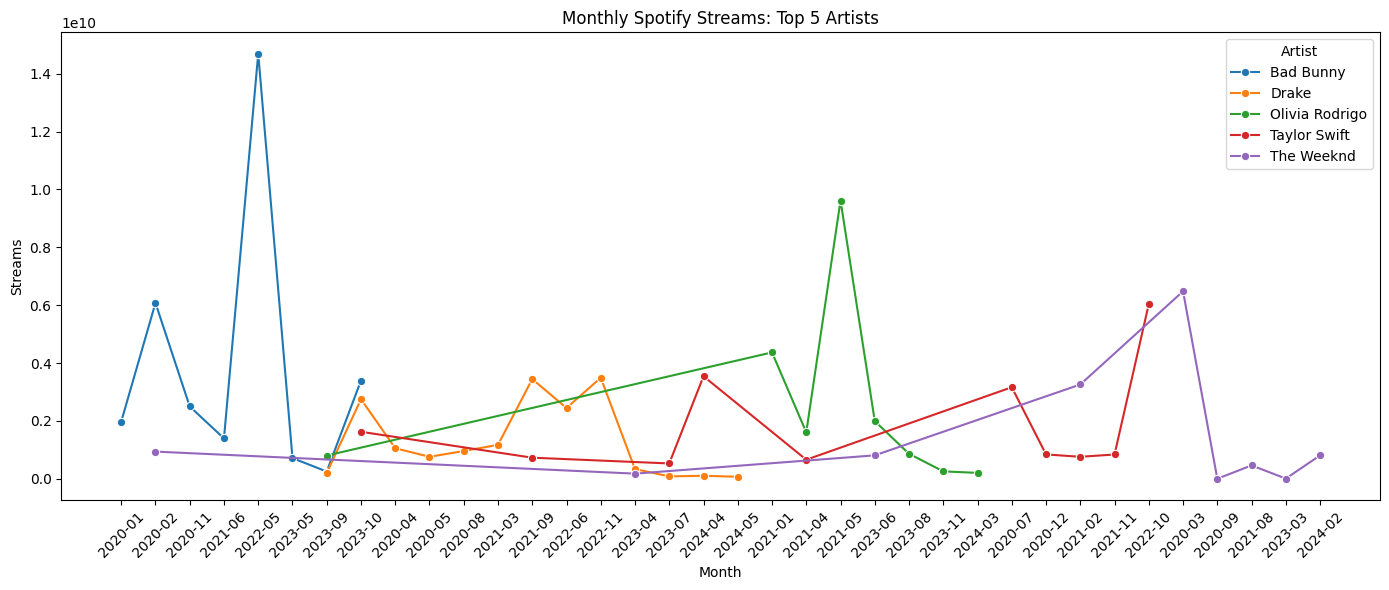

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

spotify_df = pd.read_csv("spotify_clean.csv")

top_artists = spotify_df.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(5)
print("Top 5 Artists by Spotify Streams (2020–2025):")
print(top_artists)

spotify_top5 = spotify_df[spotify_df['artist(s)_name'].isin(top_artists.index)]
spotify_top5['release_date'] = pd.to_datetime(spotify_top5['release_date'], errors='coerce')
spotify_top5['month'] = spotify_top5['release_date'].dt.to_period('M').astype(str)

spotify_monthly = spotify_top5.groupby(['artist(s)_name', 'month'])['streams'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=spotify_monthly, x='month', y='streams', hue='artist(s)_name', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Spotify Streams: Top 5 Artists")
plt.xlabel("Month")
plt.ylabel("Streams")
plt.legend(title="Artist")
plt.tight_layout()
plt.show()

In [20]:
spotify_df.rename(columns={
    'Track Name': 'track_name',
    'Artist(s)': 'artist(s)_name',
    'Streams': 'streams',
    'Release Date': 'release_date'
}, inplace=True)

spotify_df['streams'] = spotify_df['streams'].astype(str).str.replace(',', '').astype(float)

spotify_df['release_date'] = pd.to_datetime(spotify_df['release_date'], errors='coerce')
spotify_df['released_year'] = spotify_df['release_date'].dt.year
spotify_df['released_month'] = spotify_df['release_date'].dt.to_period("M")


In [21]:
top_5_artists = ['Bad Bunny', 'Drake', 'Taylor Swift', 'Olivia Rodrigo', 'The Weeknd']

In [22]:
filtered_df = spotify_df[
    (spotify_df['released_year'] >= 2020) &
    (spotify_df['released_year'] <= 2025) &
    (spotify_df['artist(s)_name'].isin(top_5_artists))
]

In [23]:
top_songs = (
    filtered_df.sort_values(['artist(s)_name', 'released_year', 'streams'], ascending=[True, True, False])
    .groupby(['artist(s)_name', 'released_year'])
    .first()
    .reset_index()
)[['artist(s)_name', 'track_name', 'released_year', 'released_month', 'streams']]

In [24]:
top_songs

,artist(s)_name,track_name,released_year,released_month,streams
0,Bad Bunny,Dakiti,2020,2020-01,1.977947e+09
1,Bad Bunny,Yonaguni,2021,2021-06,1.398634e+09
2,Bad Bunny,Me Porto Bonito,2022,2022-05,1.811991e+09
3,Bad Bunny,WHERE SHE GOES,2023,2023-05,7.178490e+08
4,Drake,Toosie Slide,2020,2020-04,1.059263e+09
5,Drake,Fair Trade (with Travis Scott),2021,2021-09,8.191362e+08
6,Drake,Jimmy Cooks (feat. 21 Savage),2022,2022-06,9.714732e+08
7,Drake,IDGAF (feat. Yeat),2023,2023-10,4.068750e+08
8,Drake,Push Ups,2024,2024-04,1.077622e+08
9,Olivia Rodrigo,drivers license,2021,2021-01,2.184754e+09


In [25]:
ig_df = pd.read_csv(r'C:\Users\BABY GIRL\Documents\simulated_instagram_data.csv')
print(ig_df.columns)

Index(['artist', 'month', 'likes', 'followers', 'engagement_rate'], dtype='object')


In [26]:
ig_df = ig_df[ig_df['artist'] != 'MUSIC LAPR.JPN']
ig_df.head(20)

,artist,month,likes,followers,engagement_rate
0,Bad Bunny,2022-05,16521670,48000000,11%
1,Bad Bunny,2022-06,16258439,48000000,11%
2,Bad Bunny,2022-07,15733355,48000000,11%
3,Drake,2023-10,7465901,144000000,2%
4,Drake,2023-11,9539634,144000000,2%
5,Drake,2023-12,7784464,144000000,2%
9,Olivia Rodrigo,2023-09,11641264,35000000,11%
10,Olivia Rodrigo,2023-10,9110185,35000000,9%
11,Olivia Rodrigo,2023-11,12267092,35000000,12%
12,Taylor Swift,2022-10,21224245,270000000,3%


In [27]:
campaign_events = pd.read_csv(r'C:\Users\BABY GIRL\Documents\/campaign_events_fixed.csv')
campaign_events["Date"] = pd.to_datetime(campaign_events["Date"])
campaign_events.head()


,Date,Artist,Event,Description
0,2020-08-24,The Weeknd,MTV VMAs Performance,"""Blinding Lights"" live at MTV VMAs"
1,2021-05-21,Olivia Rodrigo,Album Launch,"Debut album ""SOUR"" released"
2,2021-11-12,Taylor Swift,Red (Taylor’s Version),Re-release of 2012 album
3,2022-02-13,Bad Bunny,Super Bowl Appearance,Halftime cameo during Pepsi commercial
4,2022-06-17,Drake,Surprise Album Drop,"""Honestly, Nevermind"" released unexpectedly"


In [28]:
results_df.to_csv("youtube.csv", index=False)

In [29]:
spotify = pd.read_csv("spotify.csv")
youtube = pd.read_csv("youtube.csv")
instagram = pd.read_csv(r'C:\Users\BABY GIRL\Documents\simulated_instagram_data.csv')

spotify = spotify.rename(columns={"month": "Date"})
spotify["Date"] = pd.to_datetime(spotify["Date"])

num_rows = len(youtube)
youtube["Date"] = pd.date_range(start="2020-01-01", periods=num_rows, freq="MS")

instagram = instagram.rename(columns={"month": "Date"})
instagram["Date"] = pd.to_datetime(instagram["Date"])

spotify_long = spotify.rename(columns={"artist": "Artist", "streams": "Streams"})
spotify_long["Content"] = "N/A"  # Add song titles here if available
spotify_long["Platform"] = "Spotify"
spotify_long = spotify_long[["Date", "Artist", "Platform", "Content", "Streams"]]
spotify_long = spotify_long.melt(id_vars=["Date", "Artist", "Platform", "Content"],
                                 var_name="Metric", value_name="Value")

youtube_long = youtube.rename(columns={"artist": "Artist", "track": "Content", "youtube_views": "Views"})
youtube_long["Platform"] = "YouTube"
youtube_long = youtube_long[["Date", "Artist", "Platform", "Content", "Views"]]
youtube_long = youtube_long.melt(id_vars=["Date", "Artist", "Platform", "Content"],
                                 var_name="Metric", value_name="Value")

instagram_long = instagram.rename(columns={"artist": "Artist", "likes": "Likes", "engagement_rate": "Engagement"})
instagram_long["Content"] = "N/A"  # No content title, so use placeholder
instagram_long["Platform"] = "Instagram"
instagram_long = instagram_long[["Date", "Artist", "Platform", "Content", "Likes", "followers", "Engagement"]]
instagram_long = instagram_long.melt(id_vars=["Date", "Artist", "Platform", "Content"],
                                     var_name="Metric", value_name="Value")

combined_df = pd.concat([spotify_long, youtube_long, instagram_long], ignore_index=True)
combined_df.sort_values("Date", inplace=True)

combined_df.to_csv("combined_platform_data.csv", index=False)

combined_df.head(15)


,Date,Artist,Platform,Content,Metric,Value
0,2020-01-01,Bad Bunny,Spotify,N/A,Streams,1977947460.0
68,2020-01-01,The Weeknd,Instagram,N/A,Likes,645000
86,2020-01-01,The Weeknd,Instagram,N/A,followers,25000000
104,2020-01-01,The Weeknd,Instagram,N/A,Engagement,3%
48,2020-01-01,Olivia Rodrigo,YouTube,drivers license,Views,515000000
49,2020-02-01,Bad Bunny,YouTube,Dakiti,Views,474000000
69,2020-02-01,The Weeknd,Instagram,N/A,Likes,662000
87,2020-02-01,The Weeknd,Instagram,N/A,followers,25200000
1,2020-02-01,Bad Bunny,Spotify,N/A,Streams,6078289650.0
105,2020-02-01,The Weeknd,Instagram,N/A,Engagement,3%


In [30]:
combined_df.to_csv("combined_platform_data.csv", index=False)

## SQL: Aggregating Monthly Spotify Streams (Bad Bunny & Olivia Rodrigo)

In [31]:
import pandas as pd
import sqlite3

df = pd.read_csv(r"C:\Users\BABY GIRL\Documents\spotify_estimated_2020_2025.csv")

conn = sqlite3.connect(':memory:')
df.to_sql('spotify_data', conn, index=False, if_exists='replace')

query = """
SELECT 
    strftime('%Y-%m', Date) AS month,
    Artist,
    SUM(Value) AS total_streams
FROM spotify_data
WHERE Artist IN ('Bad Bunny', 'Olivia Rodrigo')
GROUP BY Artist, month
ORDER BY Artist, month;
"""

monthly_streams = pd.read_sql_query(query, conn)
monthly_streams['month'] = pd.to_datetime(monthly_streams['month'])
monthly_streams.head(12)


,month,Artist,total_streams
0,2020-02-01,Bad Bunny,1500000.00
1,2021-02-01,Bad Bunny,1731583.71
2,2022-02-01,Bad Bunny,1788779.80
3,2023-02-01,Bad Bunny,1870654.69
4,2024-02-01,Bad Bunny,1684864.98
5,2025-02-01,Bad Bunny,1625018.49
6,2020-03-01,Olivia Rodrigo,2000000.00
7,2021-03-01,Olivia Rodrigo,2272828.06
8,2022-03-01,Olivia Rodrigo,2103844.81
9,2023-03-01,Olivia Rodrigo,2134006.77


15:55:09 - cmdstanpy - INFO - Chain [1] start processing
15:55:09 - cmdstanpy - INFO - Chain [1] done processing


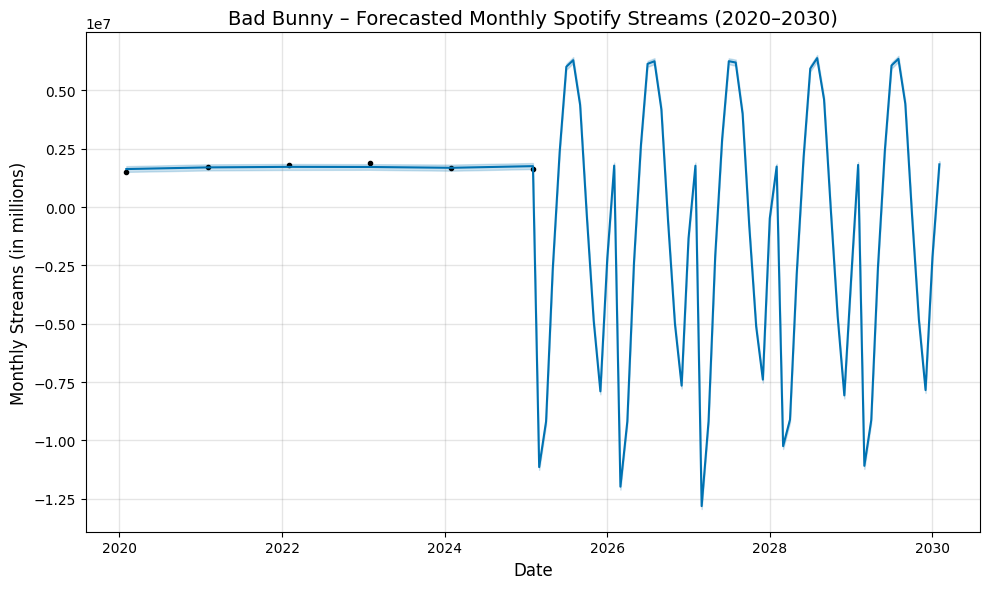

In [34]:
from prophet import Prophet
import matplotlib.pyplot as plt

bb_df = monthly_streams[monthly_streams['Artist'] == 'Bad Bunny'][['month', 'total_streams']]
bb_df = bb_df.rename(columns={'month': 'ds', 'total_streams': 'y'})

bb_model = Prophet()
bb_model.fit(bb_df)

future_bb = bb_model.make_future_dataframe(periods=60, freq='MS')
forecast_bb = bb_model.predict(future_bb)

fig_bb = bb_model.plot(forecast_bb)
plt.title('Bad Bunny – Forecasted Monthly Spotify Streams (2020–2030)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Monthly Streams (in millions)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


15:55:16 - cmdstanpy - INFO - Chain [1] start processing
15:55:16 - cmdstanpy - INFO - Chain [1] done processing


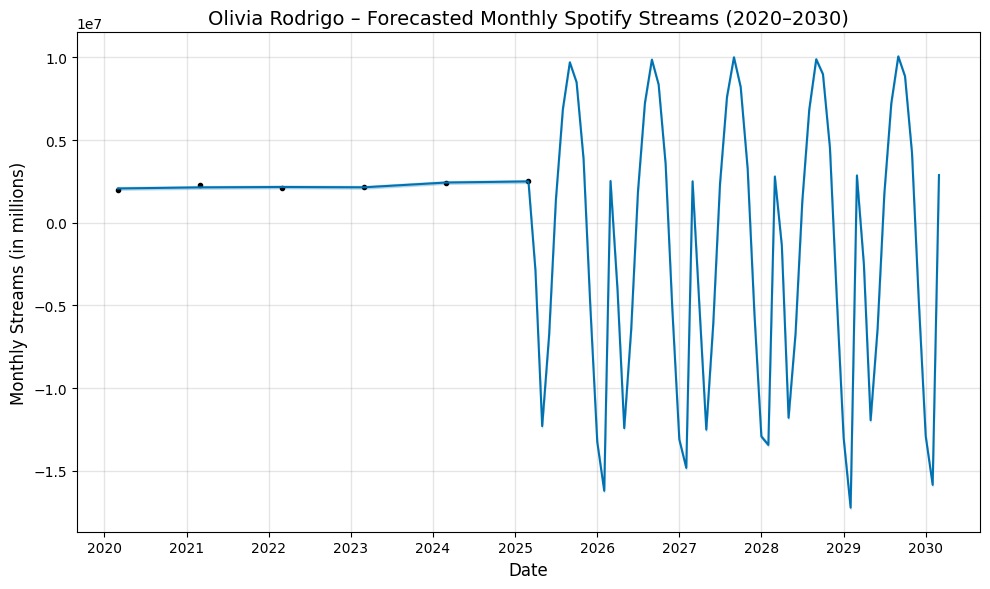

In [35]:
from prophet import Prophet
import matplotlib.pyplot as plt

olivia_df = monthly_streams[monthly_streams['Artist'] == 'Olivia Rodrigo'][['month', 'total_streams']]
olivia_df = olivia_df.rename(columns={'month': 'ds', 'total_streams': 'y'})

olivia_model = Prophet()
olivia_model.fit(olivia_df)

future_olivia = olivia_model.make_future_dataframe(periods=60, freq='MS')
forecast_olivia = olivia_model.predict(future_olivia)

fig_olivia = olivia_model.plot(forecast_olivia)

plt.title('Olivia Rodrigo – Forecasted Monthly Spotify Streams (2020–2030)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Monthly Streams (in millions)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
